In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [26]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    places = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if places not in cities:
        cities.append(places)

# Print the city count to confirm sufficient count
len(cities)

621

In [34]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name)

df=pd.DataFrame()
df['City'] = ''
df['Country'] = ''
df['Lat'] = ''
df['Lng'] = ''
df['Humidity'] = ''
df['Cloudiness'] = ''
df['Max Temp'] = ''
df['Wind Speed'] = ''

for city in cities:
    real_city = city.title()
    url = f'http://api.openweathermap.org/data/2.5/weather?q={real_city}&appid={api_key}'
    data = requests.get(url).json()
    try:
        lat = data["coord"]["lat"]
        lon = data["coord"]["lon"]
        country = data['sys']['country']
        humidity = data['main']['humidity']
        cloudiness = data['clouds']['all']
        max_temp = data['main']['temp_max']
        wind_speed = data['wind']['speed']
        df.loc[city,'City'] = real_city
        df.loc[city,'Country'] = country
        df.loc[city,'Lat'] = lat
        df.loc[city,'Lng'] = lon
        df.loc[city,'Humidity'] = humidity
        df.loc[city,'Cloudiness'] = cloudiness
        df.loc[city,'Max Temp'] = max_temp
        df.loc[city,'Wind Speed'] = wind_speed
    except KeyError:
        print(f'City {real_city} not found. Skipping...')

City Illoqqortoormiut not found. Skipping...
City Nizhneyansk not found. Skipping...
City Kobojango not found. Skipping...
City Mys Shmidta not found. Skipping...
City Barentsburg not found. Skipping...
City Buariki not found. Skipping...
City Mouzakion not found. Skipping...
City Qui Nhon not found. Skipping...
City Belushya Guba not found. Skipping...
City Korla not found. Skipping...
City Amderma not found. Skipping...
City Kyra not found. Skipping...
City Meyungs not found. Skipping...
City Taolanaro not found. Skipping...
City Sakakah not found. Skipping...
City Rawah not found. Skipping...
City Barbar not found. Skipping...
City Barawe not found. Skipping...
City Marcona not found. Skipping...
City Bairiki not found. Skipping...
City Kuche not found. Skipping...
City Samusu not found. Skipping...
City Tumannyy not found. Skipping...
City Grand River South East not found. Skipping...
City Atlantic City not found. Skipping...
City Krasnoselkup not found. Skipping...
City Attawapisk

In [37]:
df.head()

,City,Country,Lat,Lng,Humidity,Cloudiness,Max Temp,Wind Speed
luocheng,Luocheng,CN,28.29,114.55,89,100,290.89,1.341
paso de los toros,Paso De Los Toros,UY,-32.81,-56.52,78,100,286.85,8.367
puksoozero,Puksoozero,RU,62.59,40.61,97,100,278.16,2.879
castro,Castro,CL,-42.48,-73.76,54,0,286.15,4.1
freeport,Freeport,BS,26.54,-78.7,74,75,300.15,3.1


In [66]:
xaxis = df['Lat']
yaxist = df['Max Temp']
yaxish = df['Humidity']
yaxisc = df['Cloudiness']
yaxisw = df['Wind Speed']

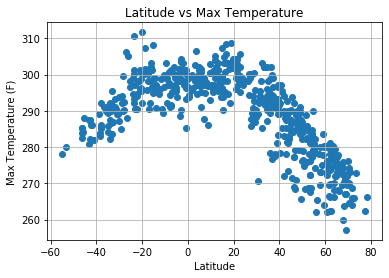

In [67]:
plt.scatter(xaxis, yaxist)
plt.grid()
plt.title('Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('temp_comparison.png')

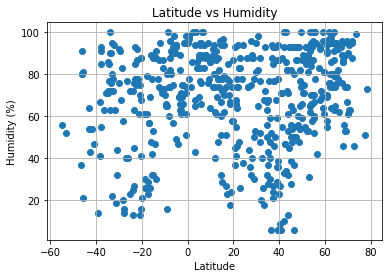

In [68]:
plt.scatter(xaxis, yaxish)
plt.grid()
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('humidity_comparison.png')

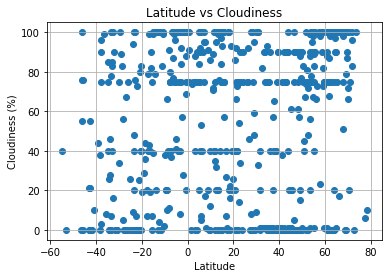

In [69]:
plt.scatter(xaxis, yaxisc)
plt.grid()
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('cloud_comparison.png')

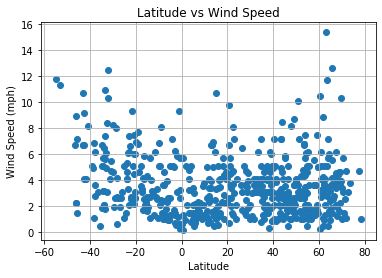

In [70]:
plt.scatter(xaxis, yaxisw)
plt.grid()
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('wind_comparison.png')

In [38]:
fdf = pd.DataFrame()
fdf['City'] = ''
fdf['Country'] = ''
fdf['Lat'] = ''
fdf['Lng'] = ''
fdf['Humidity'] = ''
fdf['Cloudiness'] = ''
fdf['Max Temp'] = ''
fdf['Wind Speed'] = ''

url = f'http://api.openweathermap.org/data/2.5/weather?q=London&appid={api_key}'
data = requests.get(url).json()
#print(json.dumps(data))
lat = data["coord"]["lat"]
lon = data["coord"]["lon"]
humidity = data['main']['humidity']
cloudiness = data['clouds']['all']
country = data['sys']['country']
max_temp = data['main']['temp_max']
wind_speed = data['wind']['speed']

fdf.loc[0,'City'] = 'London'
fdf.loc[0,'Country'] = country
fdf.loc[0,'Lat'] = lat
fdf.loc[0,'Lng'] = lon
fdf.loc[0,'Humidity'] = humidity
fdf.loc[0,'Cloudiness'] = cloudiness
fdf.loc[0,'Max Temp'] = max_temp
fdf.loc[0,'Wind Speed'] = wind_speed



fdf.head()

,City,Country,Lat,Lng,Humidity,Cloudiness,Max Temp,Wind Speed
0,London,GB,51.51,-0.13,87,52,285.37,2.6
